# Project 1: Analysis of Statewide SAT and ACT Participation Rates and Aggregate Scores



## Problem Statement

This project will examine trends in the participation rates and aggregate scores of the US Scholastic Aptitude Test (SAT) and American College Testing (ACT) tests in 2017 and 2018. As participation rates vary greatly by state, this project seeks to look for patterns and suggest to the College Board a suitable state in which to invest resources to improve SAT participation rates. 

## Executive Summary

The SAT is a standardized test in the US and is made up of Evidence-Based Reading and Writing and Math components, each with a maximum score of 800, which is added up to give a total score with a maximum of 1600. The ACT is a standardized test in the US and is made up of English, Math, Reading and Science components, scored from 1 to 36. A composite score is taken from the average score of all four components.

It is compulsory for students in some states to sit for the SAT or ACT as a criteria for graduation, while taking either test is voluntary in others. Both SAT and ACT are accepted by US universities as an indication of the student's academic ability.

Patterns in the data showed that participation in ACT or SAT was negatively correlated, with high participation for one tests usually meaning low participation in another. This is especially true for states with mandatory testing for one of the tests. Test scores in one test was also negatively correlated with the other. Interestingly, the data also showed that participation rates and test scores were negatively correlated, with high participation usually resulting in lower test scores, and vice-versa. It was also observed that East and West Coast states generally preferred the SAT while Midwest states generally preferred the ACT.

After examining the data, I conclude that efforts to increase SAT participation should be focused on Oregon. This is because Oregon does not have mandatory testing for ACT, and the College Board's efforts should be focused on states without compulsory ACT testing, since it is less likely that students would take both ACT and SAT as one test is enough for university admission. Oregon also has low participation rates for both ACT and SAT in 2017 and 2018. The population taking the ACT or SAT has also been split evenly, which means that the SAT is consistently perceived by half of Oregon's test-taking population as a better option. The College Board could focus its efforts on persuading the other half to choose SAT instead of ACT.

Recommendations for the College Board to boost participation rates in Oregon are: reducing the cost of the SAT, increase marketing on the benefits of taking the SAT, and increasing the availability of SAT prep materials in schools. 

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')

In [3]:
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 

The act_2017 dataframe shows the average national ACT participation levels and average nationwide ACT English, Math, Reading, Science and Total scores in 2017. It also shows the percentage of ACT participation and average English, Math, Reading, Science and Total scores for 51 US states in 2017.

The sat_2017 dataframe shows the percentage of SAT participation, as well as the average Evidence-Based Reading and Writing, Math and Total scores for 51 states in the US in 2017.

#### 4a. Does the data look complete? 

Answer: 

No. sat_2017 dataframe did not include a row with information on the average National participation and scores. This row is present in act_2017 (row 0).

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [6]:
sat_2017['Math'].describe()

count     51.000000
mean     547.627451
std       84.909119
min       52.000000
25%      522.000000
50%      548.000000
75%      599.000000
max      651.000000
Name: Math, dtype: float64

In [7]:
act_2017['Science'].describe()

count    52.000000
mean     21.040385
std       3.151113
min       2.300000
25%      19.900000
50%      21.150000
75%      22.525000
max      24.900000
Name: Science, dtype: float64

Answer: 

sat_2017: Row 20, 'Math' value is 52. This is not possible as minimum score for SAT Math is 200. 

act_2017: Row 21, 'Science' value is 2.3. This is highly unlikely as mean for 'Science' is 21.040385 and the standard deviation is 3.151113

act_2017: Row 52, 'Composite' value is 20.2x. Should be float 20.2


For reference:

min score for SAT: EBR = 200, Math = 200, Total = 400

max score for SAT: EBR = 800, Math = 800, Total = 1600

min score for ACT: 1 for English, Math, Reading, Science, Composite (Avg of E, M, R, S scores)

max score for ACT: 36 for English, Math, Reading, Science, Composite 


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [8]:
sat_2017.loc[20,'Math'] = 524

In [9]:
act_2017.loc[21,'Science'] = 23.2

In [10]:
act_2017.loc[51, 'Composite'] = 20.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [11]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [12]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

'Composite' in act_2017 should be float, not object 

'Participation' in act_2017 and sat_2017 should be int, not object 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [13]:
def to_int(x):
    try:
        out = int(x)     
    except:
        out = np.nan       
    return out

In [14]:
act_2017['Participation'] = act_2017['Participation'].str.replace('%', '').apply(to_int)

In [15]:
sat_2017['Participation'] = sat_2017['Participation'].str.replace('%', '').apply(to_int)

- Fix any individual values preventing other columns from being the appropriate type.

In [16]:
def to_flt(x):
    try:
        out = float(x)     
    except:
        out = np.nan       
    return out

In [17]:
act_2017['Composite'] = act_2017['Composite'].apply(to_flt)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [18]:
act_2017.head(2)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2


In [19]:
sat_2017.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080


- Display the data types again to confirm they are correct.

In [20]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [21]:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [22]:
act_2017.rename(columns={'State':'state',
                        'Participation':'act_2017_participation_pct',
                        'English':'act_2017_english',
                        'Math':'act_2017_math',
                         'Reading':'act_2017_reading',
                         'Science': 'act_2017_science',
                         'Composite':'act_2017_composite'},
                inplace=True)

In [23]:
act_2017.head(2)

,state,act_2017_participation_pct,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2


In [24]:
sat_2017.rename(columns={'State':'state',
                        'Participation':'sat_2017_participation_pct',
                        'Evidence-Based Reading and Writing':'sat_2017_evidence_based_reading_and_writing',
                        'Math':'sat_2017_math',
                         'Total':'sat_2017_total'},
                inplace=True)

In [25]:
sat_2017.head(2)

,state,sat_2017_participation_pct,sat_2017_evidence_based_reading_and_writing,sat_2017_math,sat_2017_total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


**Data Dictionary for act_2017 and sat_2017 dataframes**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|Names of US States| 
|act_2018_participation_pct|int|ACT|Members of the graduating class who had taken the ACT as a percentage of the total number of high school graduates in 2017| 
|act_2017_english|float|ACT|Mean score for the English component of the ACT in 2017| 
|act_2017_math|float|ACT|Mean score for the Math component of the ACT in 2017| 
|act_2017_reading|float|ACT|Mean score for the Reading component of the ACT in 2017| 
|act_2017_science|float|ACT|Mean score for the Science component of the ACT in 2017| 
|act_2017_composite|float|ACT|Mean composite score for the ACT, which takes the average of the English, Math, Reading and Science scores in 2017| 
|sat_2017_participation_pct|int|SAT|Members of the graduating class who had taken the SAT test as a percentage of the total number of high school graduates in 2017| 
|sat_2017_evidence_based_reading_and_writing|int|SAT|Mean score for the Evidence-Based Reading and Writing component of the SAT in 2017| 
|sat_2017_math|int|SAT|Mean score for the Math component of the SAT in 2017| 
|sat_2017_total|int|SAT|Mean total score for the SAT in 2017| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [26]:
act_2017 = act_2017.drop(act_2017.index[0])

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [27]:
combined_2017 = pd.merge(act_2017, sat_2017, how='left')

In [28]:
combined_2017.head()

,state,act_2017_participation_pct,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation_pct,sat_2017_evidence_based_reading_and_writing,sat_2017_math,sat_2017_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,1208
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [29]:
combined_2017.to_csv('../data/combined_2017.csv', index = False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [30]:
#import act_2018 and sat_2018 csv files as pandas dataframes

act_2018 = pd.read_csv('../data/act_2018_updated.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')

I chose to import the act_2018_updated.csv file as the act_2018 dataframe as its data is complete and identical to the columns specified in act_2017. 

In [31]:
#display data from act_2018
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [32]:
act_2018.tail()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
46,Virginia,24,23.9,23.8,23.3,24.7,23.5
47,Washington,24,22.2,21.4,22.2,22.7,22.0
48,West Virginia,65,20.3,19.8,19.4,21.3,20.4
49,Wisconsin,100,20.5,19.8,20.3,20.6,20.8
50,Wyoming,100,20.0,19.0,19.7,20.6,20.3


The act_2018 dataframe shows the percentage of ACT participation as well as English, Math, Reading, Science and Total scores for 51 US states in 2018. Data looks complete

In [33]:
#display data from sat_2018
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [34]:
sat_2018.tail()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,68%,567,550,1117
47,Washington,69%,543,538,1081
48,West Virginia,28%,513,486,999
49,Wisconsin,3%,641,653,1294
50,Wyoming,3%,633,625,1257


The sat_2017 dataframe shows the average SAT participation levels, as well as Evidence-Based Reading and Writing, Math and Total scores for 51 states in the US. Data looks complete



In [35]:
#Amending inaccurate data in 'Delaware' row in act_2018

act_2018.loc[7,'Composite'] = 23.8

In [36]:
#Amending inaccurate data in sat_2017

#Amending inaccurate data in 'Florida' row
sat_2018.loc[9, 'Participation']= '97%'
sat_2018.loc[9, 'Evidence-Based Reading and Writing']= 522
sat_2018.loc[9, 'Math'] = 493
sat_2018.loc[9, 'Total'] = 1014

#Amending inaccurate data in 'Indiana' row
sat_2018.loc[14, 'Participation']= '67%'
sat_2018.loc[14, 'Evidence-Based Reading and Writing']= 546
sat_2018.loc[14, 'Math'] = 539
sat_2018.loc[14, 'Total'] = 1086

#Amending inaccurate data in 'Hawaii' row
sat_2018.loc[11, 'Evidence-Based Reading and Writing']= 550
sat_2018.loc[11, 'Math'] = 549
sat_2018.loc[11, 'Total'] = 1099

#Amending inaccurate data in 'Utah' row
sat_2018.loc[44, 'Evidence-Based Reading and Writing']= 618
sat_2018.loc[44, 'Math'] = 612
sat_2018.loc[44, 'Total'] = 1230

In [37]:
#checking data type and if necessary, changing to appropriate data type

act_2018.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
Composite                        float64
dtype: object

Data types in act_2018 are appropriate

In [38]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

Data types in sat_2018 are mostly appropriate with the exception of the 'Participation' column, which should be an int

In [39]:
#changing data type of sat_2018['Participation'] to int 

sat_2018['Participation'] = sat_2018['Participation'].str.replace('%', '').astype(int)

In [40]:
#checking output of sat_2018

sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [41]:
# making sure that data type has been changed correctly 

sat_2018.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [42]:
# changing column names of act_2018 and sat_2018 to be consistent with column names of combined_2017 dataframe

act_2018.rename(columns={'State':'state',
                        'Percentage of Students Tested':'act_2018_participation_pct',
                        'Average Composite Score':'act_2018_composite',
                         'Average English Score':'act_2018_english',
                        'Average Math Score':'act_2018_math',
                         'Average Reading Score':'act_2018_reading',
                         'Average Science Score': 'act_2018_science'},
                inplace=True)

sat_2018.rename(columns={'State':'state',
                        'Participation':'sat_2018_participation_pct',
                        'Evidence-Based Reading and Writing':'sat_2018_evidence_based_reading_and_writing',
                        'Math':'sat_2018_math',
                         'Total':'sat_2018_total'},
                inplace=True)

In [43]:
# check if changes were correct 

act_2018.head()

,state,act_2018_participation_pct,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,Composite
0,Alabama,100,19.1,18.9,18.3,19.6,19.0,NaN
1,Alaska,33,20.8,19.8,20.6,21.6,20.7,NaN
2,Arizona,66,19.2,18.2,19.4,19.5,19.2,NaN
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4,NaN
4,California,27,22.7,22.5,22.5,23.0,22.1,NaN


In [44]:
sat_2018.head()

,state,sat_2018_participation_pct,sat_2018_evidence_based_reading_and_writing,sat_2018_math,sat_2018_total
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [45]:
# changing column position of 'act_2018_composite' from position[2] to position[6] to be consistent with the act_2017 dataframe

act_2017.head(2)

,state,act_2017_participation_pct,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8


In [46]:
act_2018 = act_2018[['state', 'act_2018_participation_pct','act_2018_english', 'act_2018_math', 'act_2018_reading', 
                     'act_2018_science', 'act_2018_composite']]

In [47]:
act_2018.head(2)

,state,act_2018_participation_pct,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
0,Alabama,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,33,19.8,20.6,21.6,20.7,20.8


**Data Dictionary for act_2018 and sat_2018 dataframes**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|Names of US States| 
|act_2018_participation_pct|int|ACT|Members of the graduating class who had taken the ACT as a percentage of the total number of high school graduates in 2018| 
|act_2018_english|float|ACT|Mean score for the English component of the ACT in 2018| 
|act_2018_math|float|ACT|Mean score for the Math component of the ACT in 2018| 
|act_2018_reading|float|ACT|Mean score for the Reading component of the ACT in 2018| 
|act_2018_science|float|ACT|Mean score for the Science component of the ACT in 2018| 
|act_2018_composite|float|ACT|Mean composite score for the ACT, which takes the average of the English, Math, Reading and Science scores in 2018| 
|sat_2018_participation_pct|int|SAT|Members of the graduating class who had taken the SAT test as a percentage of the total number of high school graduates in 2018| 
|sat_2018_evidence_based_reading_and_writing|int|SAT|Mean score for the Evidence-Based Reading and Writing component of the SAT in 2018| 
|sat_2018_math|int|SAT|Mean score for the Math component of the SAT in 2018| 
|sat_2018_total|int|SAT|Mean total score for the SAT in 2018| 

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [48]:
# merging act_2018 and sat_2018

combined_2018 = pd.merge(act_2018, sat_2018, how='left')

In [49]:
# checking combined_2018 dataframe
combined_2018.head()

,state,act_2018_participation_pct,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation_pct,sat_2018_evidence_based_reading_and_writing,sat_2018_math,sat_2018_total
0,Alabama,100,18.9,18.3,19.6,19.0,19.1,6,595,571,1166
1,Alaska,33,19.8,20.6,21.6,20.7,20.8,43,562,544,1106
2,Arizona,66,18.2,19.4,19.5,19.2,19.2,29,577,572,1149
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4,5,592,576,1169
4,California,27,22.5,22.5,23.0,22.1,22.7,60,540,536,1076


In [50]:
# merging combined_2017 and combined_2018 

final = pd.merge(combined_2017, combined_2018, how='left')

In [51]:
# checking final dataframe 
final.head()

,state,act_2017_participation_pct,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation_pct,sat_2017_evidence_based_reading_and_writing,sat_2017_math,...,act_2018_participation_pct,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation_pct,sat_2018_evidence_based_reading_and_writing,sat_2018_math,sat_2018_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,...,100,18.9,18.3,19.6,19.0,19.1,6,595,571,1166
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,...,33,19.8,20.6,21.6,20.7,20.8,43,562,544,1106
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,...,66,18.2,19.4,19.5,19.2,19.2,29,577,572,1149
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,...,100,19.1,18.9,19.7,19.4,19.4,5,592,576,1169
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,...,27,22.5,22.5,23.0,22.1,22.7,60,540,536,1076


In [52]:
#saving final as .csv file 

final.to_csv('../data/final.csv', index = False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [53]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_2017_participation_pct,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_2017_participation_pct,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_2017_evidence_based_reading_and_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [54]:
def mean(data):
    return (sum(data)/len(data))

def variance(data):
    m = mean(data)
    return mean([(x - m) **2 for x in data])

def std(data):
    return variance(data) ** 0.5

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [55]:
sd = final.std()

In [56]:
{column: data for column, data in sd.items()}

{'act_2017_participation_pct': 32.14084201588683,
 'act_2017_english': 2.35367713980303,
 'act_2017_math': 1.9819894936505533,
 'act_2017_reading': 2.0672706264873146,
 'act_2017_science': 1.7393530462812443,
 'act_2017_composite': 2.020694891154341,
 'sat_2017_participation_pct': 35.276632270013046,
 'sat_2017_evidence_based_reading_and_writing': 45.66690138768932,
 'sat_2017_math': 47.12139516560329,
 'sat_2017_total': 92.49481172519046,
 'act_2018_participation_pct': 34.08097623567245,
 'act_2018_english': 2.4463562339793055,
 'act_2018_math': 2.035764538177723,
 'act_2018_reading': 2.1672445684804105,
 'act_2018_science': 1.8701137639716146,
 'act_2018_composite': 2.1062781969951776,
 'sat_2018_participation_pct': 38.0141872380898,
 'sat_2018_evidence_based_reading_and_writing': 45.31767607353539,
 'sat_2018_math': 48.887562073498785,
 'sat_2018_total': 93.84387535250485}

In [57]:
np.std(final)

act_2017_participation_pct                     31.824176
act_2017_english                                2.330488
act_2017_math                                   1.962462
act_2017_reading                                2.046903
act_2017_science                                1.722216
act_2017_composite                              2.000786
sat_2017_participation_pct                     34.929071
sat_2017_evidence_based_reading_and_writing    45.216970
sat_2017_math                                  46.657134
sat_2017_total                                 91.583511
act_2018_participation_pct                     33.745195
act_2018_english                                2.422254
act_2018_math                                   2.015707
act_2018_reading                                2.145892
act_2018_science                                1.851689
act_2018_composite                              2.085526
sat_2018_participation_pct                     37.639654
sat_2018_evidence_based_reading

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

The manually calculated standard deviations match up with the output from pandas decribe, but not numpy's std method. This is because the np.std() function has “Delta Degrees of Freedom” parameter, which by default is zero. The same parameter is 1 for std() method in pandas

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

**Highest and Lowest Participation Rates for 2017 and 2018 SAT and ACT**

In [58]:
final[["state", "sat_2017_participation_pct"]][final["sat_2017_participation_pct"] == 100].head()

,state,sat_2017_participation_pct
6,Connecticut,100
7,Delaware,100
8,District of Columbia,100
22,Michigan,100


Connecticut, Delaware, District of Columbia and Michigan have the highest 2017 SAT participation rates at 100%. These states have compulsory testing for SAT  

In [59]:
final[['state','sat_2017_participation_pct']].sort_values('sat_2017_participation_pct', ascending=True).head()

,state,sat_2017_participation_pct
34,North Dakota,2
24,Mississippi,2
15,Iowa,2
25,Missouri,3
44,Utah,3


Iowa, Mississippi and North Dakota have the lowest 2017 SAT participation rates of 2%, while Missouri and Utah has participation rates of 3% 

In [60]:
final[["state", "sat_2018_participation_pct"]][final["sat_2018_participation_pct"] == 100].head()

,state,sat_2018_participation_pct
5,Colorado,100
6,Connecticut,100
7,Delaware,100
12,Idaho,100
22,Michigan,100


Colorado, Connecticut, Delaware, Idaho and Michigan have the highest 2018 SAT participation rates at 100%. Compared to 2017, Colorado and Idaho made SAT compulsory while District of Columbia made it not compulsory 

In [61]:
final[['state','sat_2018_participation_pct']].sort_values('sat_2018_participation_pct', ascending=True).head()

,state,sat_2018_participation_pct
34,North Dakota,2
50,Wyoming,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3


North Dakota has the lowest SAT 2018 participation rate at 2%, while Wyoming, South Dakota, Nebraska and Wisconsin had participation rates of 3%

In [62]:
final[["state", "act_2017_participation_pct"]][final["act_2017_participation_pct"] == 100].head(20)

,state,act_2017_participation_pct
0,Alabama,100
3,Arkansas,100
5,Colorado,100
17,Kentucky,100
18,Louisiana,100
23,Minnesota,100
24,Mississippi,100
25,Missouri,100
26,Montana,100
28,Nevada,100


Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississipi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin and Wyoming have the highest 2017 ACT participation rates at 100%. These states have compulsory ACT.

In [63]:
final[['state','act_2017_participation_pct']].sort_values('act_2017_participation_pct', ascending=True).head()

,state,act_2017_participation_pct
19,Maine,8
29,New Hampshire,18
7,Delaware,18
39,Rhode Island,21
38,Pennsylvania,23


Maine has the lowest ACT 2017 participation rate at 8% 

In [64]:
final[["state", "act_2018_participation_pct"]][final["act_2018_participation_pct"] == 100 ].head(20)

,state,act_2018_participation_pct
0,Alabama,100
3,Arkansas,100
17,Kentucky,100
18,Louisiana,100
24,Mississippi,100
25,Missouri,100
26,Montana,100
27,Nebraska,100
28,Nevada,100
33,North Carolina,100


Alabama, Arkansas, Kentucky, Louisiana, Mississipi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin and Wyoming have the highest 2018 ACT participation rates at 100% 

In [65]:
final[['state','act_2018_participation_pct']].sort_values('act_2018_participation_pct', ascending=True).head()

,state,act_2018_participation_pct
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20


Maine has the lowest ACT 2018 participation rate at 7% 

**Highest and Lowest Total/Composite Scores for 2017 and 2018 SAT and ACT**

In [66]:

final[['state','sat_2017_total']].sort_values('sat_2017_total', ascending=False).head()

,state,sat_2017_total
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


Minnesota, Wisconsin, Iowa, Missouri, Kansas had the highest mean total scores for 2017 SAT

In [67]:
final[['state','sat_2017_total']].sort_values('sat_2017_total', ascending=False).tail()

,state,sat_2017_total
19,Maine,1012
12,Idaho,1005
22,Michigan,1005
7,Delaware,996
8,District of Columbia,950


Maine, Idaho, Michigan, Delaware, District of Columbia has the lowest mean total score for 2017 SAT

In [68]:
final[['state','sat_2018_total']].sort_values('sat_2018_total', ascending=False).head()

,state,sat_2018_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


Minnesota, Wisconsin, North Dakota, Iowa, Kansas had the highest mean total score for 2018 SAT

In [69]:
final[['state','sat_2018_total']].sort_values('sat_2018_total', ascending=False).tail()

,state,sat_2018_total
22,Michigan,1011
12,Idaho,1001
48,West Virginia,999
7,Delaware,998
8,District of Columbia,977


Michigan, Idaho, West Virginia, Delaware, District of Columbia had the lowest mean total score for 2017 SAT

In [70]:
final[['state','act_2017_composite']].sort_values('act_2017_composite', ascending=False).head()

,state,act_2017_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


New Hampshire, Massachusetts, Connecticut, Maine, District of Columbia had the highest mean composite score for 2017 ACT

In [71]:
final[['state','act_2017_composite']].sort_values('act_2017_composite', ascending=False).tail()

,state,act_2017_composite
33,North Carolina,19.1
11,Hawaii,19.0
40,South Carolina,18.7
24,Mississippi,18.6
28,Nevada,17.8


North Carolina, Hawaii, South Carolina, Mississippi, Nevada had the lowest mean composite score for 2017 ACT

In [72]:
final[['state','act_2018_composite']].sort_values('act_2018_composite', ascending=False).head()

,state,act_2018_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


Connecticut, Massachusetts, New Hampshire, New York, Michigan had the highest mean composite score of for 2018 ACT

In [73]:
final[['state','act_2018_composite']].sort_values('act_2018_composite', ascending=False).tail()

,state,act_2018_composite
0,Alabama,19.1
11,Hawaii,18.9
24,Mississippi,18.6
40,South Carolina,18.3
28,Nevada,17.7


Alabama, Hawaii, Mississippi, South Carolina, Nevada had the lowest mean composite score for 2018 ACT

**Do any of the states with 100% on a given test have a rate change y-o-y?**

In [74]:
final[["state", "sat_2017_participation_pct","sat_2018_participation_pct"]][(final["sat_2017_participation_pct"] ==100) & (final["sat_2018_participation_pct"] <100)].head()

,state,sat_2017_participation_pct,sat_2018_participation_pct
8,District of Columbia,100,92


In [75]:
final[["state", "sat_2017_participation_pct","sat_2018_participation_pct"]][(final["sat_2018_participation_pct"] ==100) & (final["sat_2017_participation_pct"] <100)].head()

,state,sat_2017_participation_pct,sat_2018_participation_pct
5,Colorado,11,100
12,Idaho,93,100


Rate of SAT participation for District of Columbia decreased from 100% in 2017 to 92% in 2018

Rate of SAT participation for Colorado increased from 11% in 2017 to 100% in 2018

Rate of SAT participation for Idaho increased from 93% in 2017 to 100% in 2018

In [76]:
final[["state", "act_2017_participation_pct","act_2018_participation_pct"]][(final["act_2017_participation_pct"] == 100) & (final["act_2018_participation_pct"] <100)].head()

,state,act_2017_participation_pct,act_2018_participation_pct
5,Colorado,100,30
23,Minnesota,100,99


In [77]:
final[["state", "act_2017_participation_pct","act_2018_participation_pct"]][(final["act_2018_participation_pct"] == 100) & (final["act_2017_participation_pct"] <100)].head()

,state,act_2017_participation_pct,act_2018_participation_pct
27,Nebraska,84,100
35,Ohio,75,100


Rate of ACT participation for by Colorado decreased from 100% in 2017 to 30% in 2018

Rate of ACT participation for Minnesota decreased from 100% in 2017 to 99% in 2018

Rate of ACT participation for Nebraska increased from 84% in 2017 to 100% in 2018

Rate of ACT participation for Ohio increased from 75% in 2017 to 100% in 2018

**Do any of the states show >50% participation on both tests on either year?**

In [78]:
final[["state", "act_2017_participation_pct", 'sat_2017_participation_pct']][(final['act_2017_participation_pct'] >= 50) & (final['sat_2017_participation_pct'] >=50)].head()

,state,act_2017_participation_pct,sat_2017_participation_pct
9,Florida,73,83
10,Georgia,55,61
11,Hawaii,90,55
40,South Carolina,100,50


Florida, Georgia, Hawaii and South Carolina show >50% participation in both 2017 ACT and SAT

In [79]:
final[["state", "act_2018_participation_pct", 'sat_2018_participation_pct']][(final['act_2018_participation_pct'] >= 50) & (final['sat_2018_participation_pct'] >=50)].head()

,state,act_2018_participation_pct,sat_2018_participation_pct
9,Florida,66,97
10,Georgia,53,70
11,Hawaii,89,56
33,North Carolina,100,52
40,South Carolina,100,55


Florida, Georgia, Hawaii, North Carolina and South Carolina show >50% participation in both 2018 ACT and SAT

#### States I am especially interested in and why

District of Columbia - it achieved the lowest mean total score in SAT 2017, and the following year its participation rate in 2018 SAT fell. 

Colorado - why did its participation in ACT decrease from 100% in 2017 to 30% in 2018 and SAT participation increase from 11% to 100% 

North Carolina and South Carolina - why do they have high participation rates for both SAT and ACT?

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

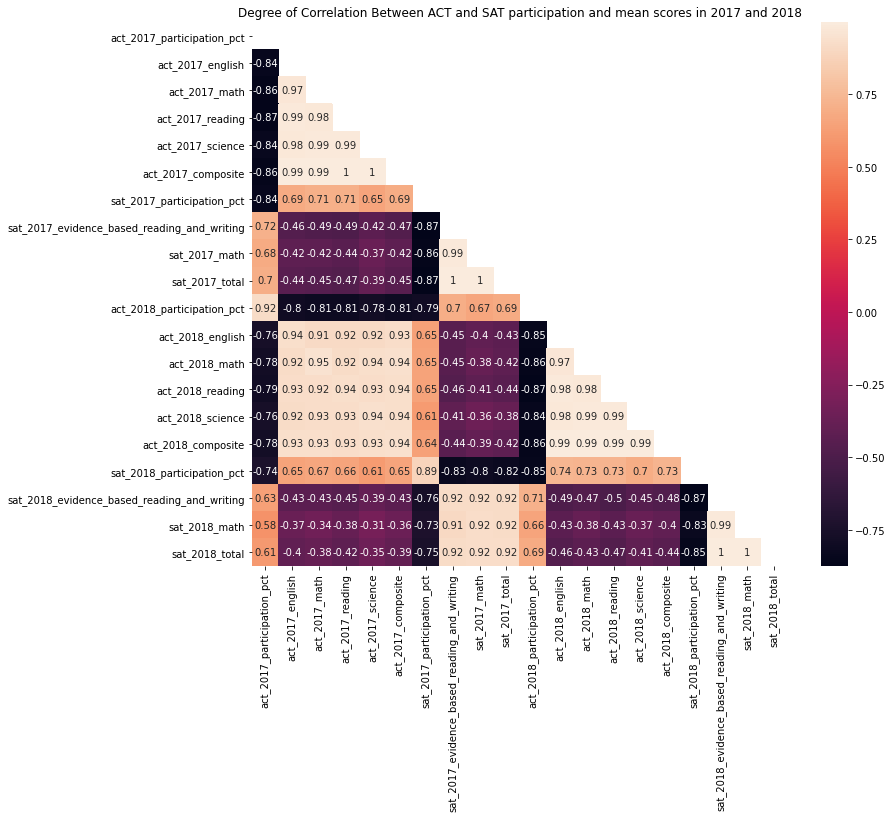

In [80]:
plt.figure(figsize=(12,10))

mask = np.zeros_like(final.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True           #remove comparison of same column

final_heatmap = sns.heatmap(final.corr(), annot=True, mask = mask)

plt.title('Degree of Correlation Between ACT and SAT participation and mean scores in 2017 and 2018');

#### Observations based on heatmap

Scores of the same test are strongly positively correlated (close to or =1), i.e., ACT english, math, reading, science, composite are closely positively correlated. Also applies for SAT EBRW, math and total.

ACT composite and SAT total scores are weakly negatively correlated (~-0.4) i.e., states with higher ACT score mostly have lower SAT score

Participation in ACT 2017 and 2018 strongly positively correlated (~0.9)

Participation in SAT 2017 and 2018 strongly positively correlated (~0.9)

Participation in ACT and SAT are strongly negatively correlated (~-0.8)

Participation in SAT vs SAT scores are strongly negatively correlated (~-0.85) ie: trend shows as ACT participation increase, scores decrease

Participation in ACT vs ACT scores are strongly negatively correlated (~-0.85) ie: trend shows as ACT participation increase, scores decrease

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [81]:
def subplot_histograms(dataframe, list_of_columns, title, xlabel1, xlabel2, xlabel3, xlabel4, ylabel):
    nrows = int(np.ceil(len(list_of_columns)/4)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(15,6)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists 
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[0].set_xlabel(xlabel1)
        ax[1].set_xlabel(xlabel2)
        ax[2].set_xlabel(xlabel3)
        ax[3].set_xlabel(xlabel4)
        ax[0].set_ylabel(ylabel)      

    plt.title(title, loc='right', fontsize=16)
    
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

#### Histogram depicting SAT and ACT Participation Rates in 2017 and 2018

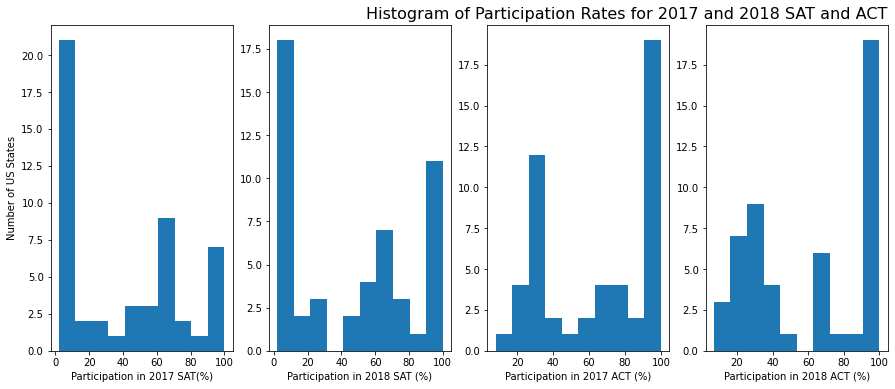

In [82]:
subplot_histograms(final, ['sat_2017_participation_pct', 'sat_2018_participation_pct',
                          'act_2017_participation_pct', 'act_2018_participation_pct'], 
                   'Histogram of Participation Rates for 2017 and 2018 SAT and ACT', 
                   'Participation in 2017 SAT(%)', 
                   'Participation in 2018 SAT (%)',
                   'Participation in 2017 ACT (%)', 
                   'Participation in 2018 ACT (%)',
                   'Number of US States')


#### Observations:

Comparing 2017 and 2018 SAT:
2018 SAT has more states in highest band of participation rates and less states in lowest band of participation rates compared to 2017 SAT. (Shows improved participation from 2017 to 2018)

Comparing 2017 and 2018 ACT:
2017 ACT and 2018 ACT has around same number of states with 100% participation. However, there appears to be marginally more states with participation between 0-50%

Comparing SAT and ACT:
SAT participation has significantly larger proportion of states in lowest band of participation than ACT participation. ACT particiipation has significantly larger proportion of states in highest band of participation than SAT

#### Histogram depicting SAT and ACT Math Scores in 2017 and 2018

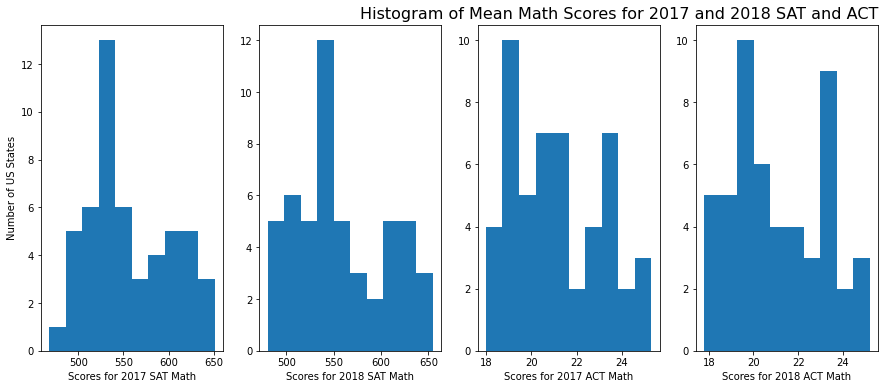

In [83]:
subplot_histograms(final, ['sat_2017_math', 'sat_2018_math', 'act_2017_math', 'act_2018_math'], 
                   'Histogram of Mean Math Scores for 2017 and 2018 SAT and ACT', 
                   'Scores for 2017 SAT Math', 'Scores for 2018 SAT Math', 'Scores for 2017 ACT Math', 
                   'Scores for 2018 ACT Math',
                   'Number of US States' )

#### Observations:

Comparing 2017 and 2018 SAT Math scores: Not much difference between mean math scores at 2017 SAT and 2018 SAT

Comparing 2017 and 2018 ACT Math scores: Improvement in number of states achieving mean math score in upper half of scoring band in 2018 compared to 2017

Comparing SAT and ACT math scores: More states in the higher scoring bands for ACT than SAT, but difference is marginal

#### Histogram depicting SAT Evidence-based Reading and Writing Scores and ACT Reading Scores in 2017 and 2018

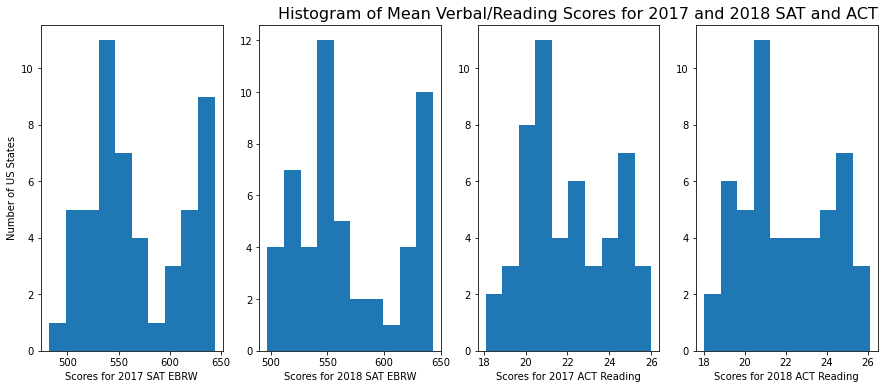

In [84]:
subplot_histograms(final, ['sat_2017_evidence_based_reading_and_writing', 
                           'sat_2018_evidence_based_reading_and_writing', 
                          'act_2017_reading', 'act_2018_reading'], 
                   'Histogram of Mean Verbal/Reading Scores for 2017 and 2018 SAT and ACT', 
                   'Scores for 2017 SAT EBRW', 'Scores for 2018 SAT EBRW', 
                   'Scores for 2017 ACT Reading', 'Scores for 2018 ACT Reading',
                   'Number of US States')

#### Observations
Comparing 2017 and 2018 SAT Evidence-based reading and writing scores: More states in lowest and 2nd lowest scoring bands in 2018 compared to 2017. 

Comparing 2017 and 2018 ACT reading scores: Scores seem similar

Comparing SAT Evidence-based reading and writing scores and ACT reading scores: More states with SAT EBRW score in highest scoring band than ACT reading score in highest scoring band

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [85]:
def subplot_scatter(dataframe, col1, col2, title, xlabel, ylabel):
    sns.regplot(dataframe[col1], dataframe[col2], ci=None, line_kws = {'color':'grey'})
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


#### Scatter plot comparing Math, Reading, Composite/Total scores for SAT vs. ACT in 2017 and 2018

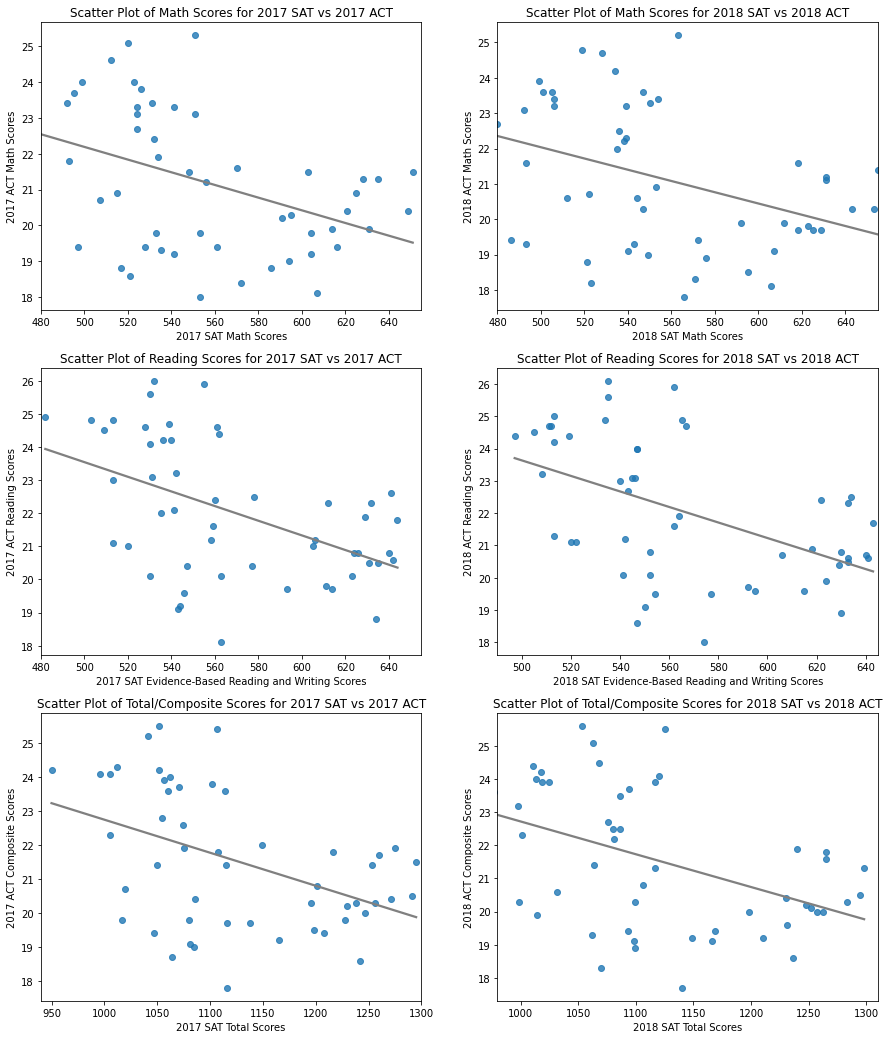

In [86]:
plt.figure(figsize=(15,18))

plt.subplot(3,2,1)
subplot_scatter(final, 'sat_2017_math', 'act_2017_math', 'Scatter Plot of Math Scores for 2017 SAT vs 2017 ACT',
               '2017 SAT Math Scores', '2017 ACT Math Scores' )
plt.gca().set_xlim(480,655)
 
plt.subplot(3,2,2)
subplot_scatter(final, 'sat_2018_math', 'act_2018_math', 'Scatter Plot of Math Scores for 2018 SAT vs 2018 ACT',
               '2018 SAT Math Scores', '2018 ACT Math Scores' )
plt.gca().set_xlim(480,655)

plt.subplot(3,2,3)
subplot_scatter(final, 'sat_2017_evidence_based_reading_and_writing', 'act_2017_reading', 
                'Scatter Plot of Reading Scores for 2017 SAT vs 2017 ACT',
               '2017 SAT Evidence-Based Reading and Writing Scores', '2017 ACT Reading Scores' )
plt.gca().set_xlim(480,655)

plt.subplot(3,2,4)
subplot_scatter(final, 'sat_2018_evidence_based_reading_and_writing', 'act_2018_reading', 
                'Scatter Plot of Reading Scores for 2018 SAT vs 2018 ACT',
               '2018 SAT Evidence-Based Reading and Writing Scores', '2018 ACT Reading Scores' )
plt.gca().set_xlim(490,645)

plt.subplot(3,2,5)
subplot_scatter(final, 'sat_2017_total', 'act_2017_composite', 
                'Scatter Plot of Total/Composite Scores for 2017 SAT vs 2017 ACT',
               '2017 SAT Total Scores', '2017 ACT Composite Scores')
plt.gca().set_xlim(940,1300)

plt.subplot(3,2,6)
subplot_scatter(final, 'sat_2018_total', 'act_2018_composite', 
                'Scatter Plot of Total/Composite Scores for 2018 SAT vs 2018 ACT',
               '2018 SAT Total Scores', '2018 ACT Composite Scores' )
plt.gca().set_xlim(980,1310);



#### Observation:

The scatter plots above show that there is a negative correlation between SAT and ACT scores (applies for Math, Reading and Composite/Total scores) for both 2017 and 2018. This is because a state which has high SAT participation, thereby a lower mean total score, usually has low ACT participation, thereby a high mean composite score. This is true for the reverse. Therefore, the negative correlation does not mean that students who do badly in one test will do well in another. 

#### Scatter plot comparing 2017 and 2018 ACT Composite Scores as well as 2017 and 2018 SAT Total Scores

(17.0, 26.0)

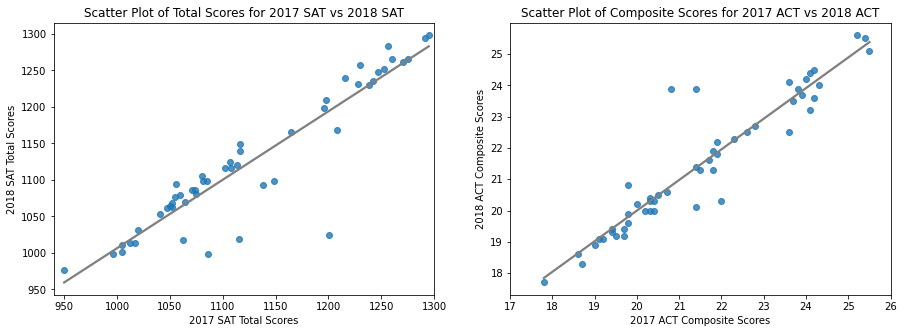

In [87]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
subplot_scatter(final, 'sat_2017_total', 'sat_2018_total', 
                'Scatter Plot of Total Scores for 2017 SAT vs 2018 SAT',
               '2017 SAT Total Scores', '2018 SAT Total Scores' )
plt.gca().set_xlim(940,1300)



plt.subplot(1,2,2)
subplot_scatter(final, 'act_2017_composite', 'act_2018_composite', 
                'Scatter Plot of Composite Scores for 2017 ACT vs 2018 ACT',
               '2017 ACT Composite Scores', '2018 ACT Composite Scores' )
plt.gca().set_xlim(17,26)



#### Observation: 
There is strong positive correlation for ACT and SAT scores across years (2017 and 2018). This shows that the mean composite/total generally does not fluctuate. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

#### Boxplot depicting ACT and SAT participation rates in 2017 and 2018

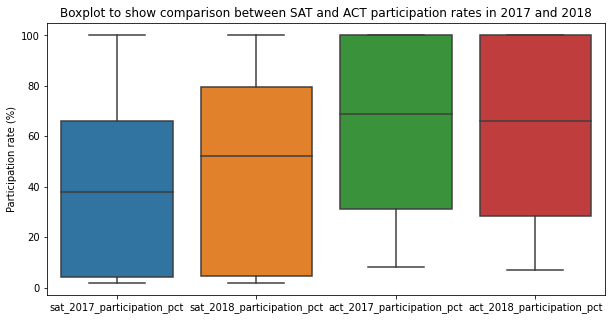

In [88]:
sat_act_part = final[['sat_2017_participation_pct','sat_2018_participation_pct', 'act_2017_participation_pct', 
                  'act_2018_participation_pct']]

plt.figure(figsize=(10,5))

sns.boxplot(data=sat_act_part)
plt.title('Boxplot to show comparison between SAT and ACT participation rates in 2017 and 2018')
plt.ylabel('Participation rate (%)');



#### Observation

Comparing SAT 2017 and 2018: 2018 SAT participation had higher mean and 75th percentile but same min and 25th percentile (more spread, higher standard deviation).

Comparing 2017 and 2018 ACT participation: 75th percentile is max value for 2017 and 2018. Lower min value, 25th percentile and mean in 2018 (more spread, higher s.d.)

Comparing SAT and ACT:
SAT min, 25th percentile, mean, 75th percentile values lower than ACT for 2017 and 2018. However, improvement in 2018 SAT participation coincided with lower min value, 25th percentile and mean for ACT in 2018

#### Boxplot depicting SAT Evidence-Based Reading and Writing scores and Math scores in 2017 and 2018

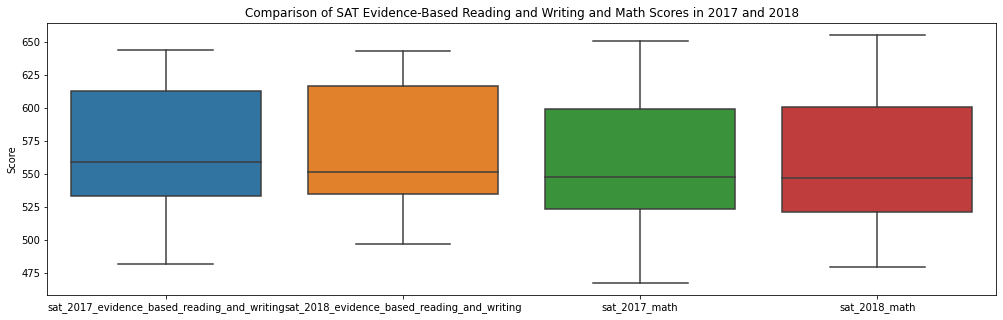

In [89]:
sat_all_scores = final[['sat_2017_evidence_based_reading_and_writing', 'sat_2018_evidence_based_reading_and_writing',
                        'sat_2017_math','sat_2018_math']]

plt.figure(figsize=(17,5))
sns.boxplot(data=sat_all_scores)
plt.title('Comparison of SAT Evidence-Based Reading and Writing and Math Scores in 2017 and 2018')
plt.ylabel('Score');

#### Observation 
SAT math scores have higher max and min values but lower 25th, 75th percentile and mean than SAT Evidence-based reading and writing scores. This means spread is higher for math scores

#### Boxplot depicting SAT total scores in 2017 and 2018

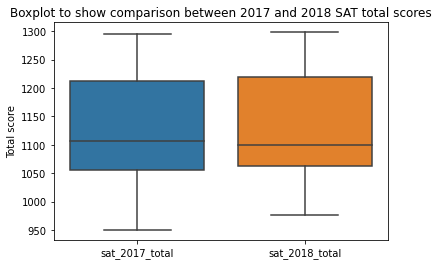

In [90]:
sat_score = final[['sat_2017_total', 'sat_2018_total']]
sns.boxplot(data=sat_score)

plt.title('Boxplot to show comparison between 2017 and 2018 SAT total scores')
plt.ylabel('Total score');

#### Observation 
SAT 2018 total score has a higher max value, min value, 75th percentile and 25th percentile but lower mean than SAT 2017 participation. Spread is about the same 

#### Boxplot depicting ACT scores in 2017 and 2018

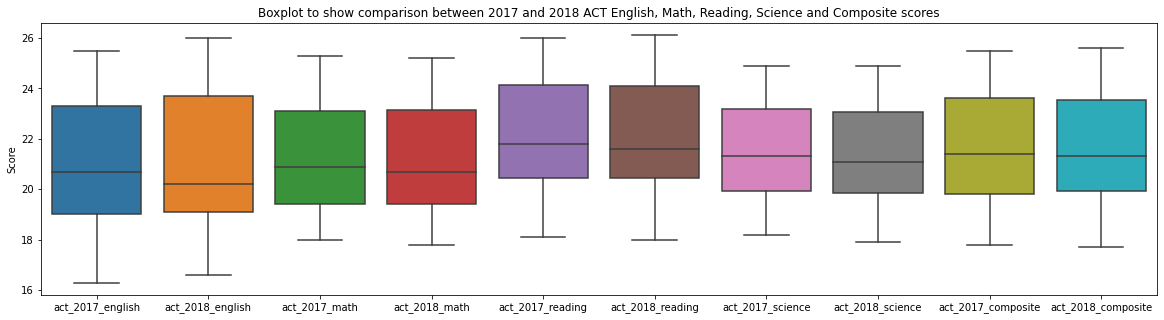

In [91]:
act_score_all = final[['act_2017_english', 'act_2018_english', 'act_2017_math', 'act_2018_math', 
                      'act_2017_reading', 'act_2018_reading', 'act_2017_science', 'act_2018_science',
                      'act_2017_composite', 'act_2018_composite']]

plt.figure(figsize=(20,5))


sns.boxplot(data=act_score_all)

plt.title('Boxplot to show comparison between 2017 and 2018 ACT English, Math, Reading, Science and Composite scores')
plt.ylabel('Score');

#### Observation

ACT english scores have lowest mean and largest spread (highest standard deviation). ACT science scores have lowest max value. ACT reading scores have highest min, 25th percentile, mean, 75th percentile and max values 

Slight decrease in ACT participation in 2018 corresponded slightly less spread in composite score

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### Scatter plot comparing ACT and SAT Participation in 2017/2018

(5.0, 101.0)

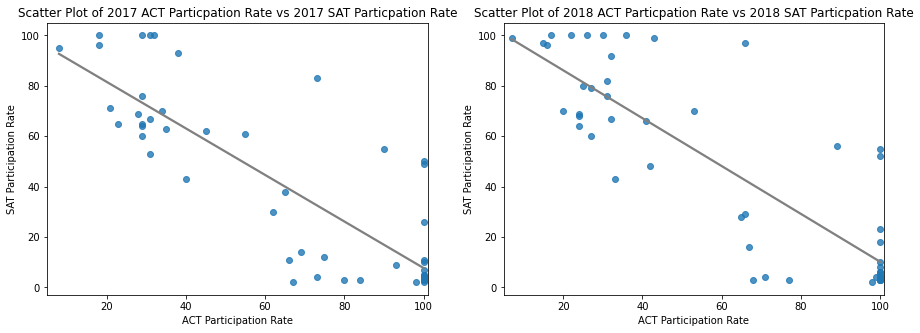

In [92]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
subplot_scatter(final, 'act_2017_participation_pct', 'sat_2017_participation_pct', 
                'Scatter Plot of 2017 ACT Particpation Rate vs 2017 SAT Particpation Rate',
               'ACT Participation Rate', 'SAT Participation Rate' )
plt.gca().set_xlim(5,101)


plt.subplot(1,2,2)
subplot_scatter(final, 'act_2018_participation_pct', 'sat_2018_participation_pct', 
                'Scatter Plot of 2018 ACT Particpation Rate vs 2018 SAT Particpation Rate',
               'ACT Participation Rate', 'SAT Participation Rate' )
plt.gca().set_xlim(5,101)



#### Observation

There is a negative correlation between participation rates for ACT and SAT. Higher rates for one usually mean lower rates for the other

#### Scatter plot comparing the relationship between participation rates and composite/total scores

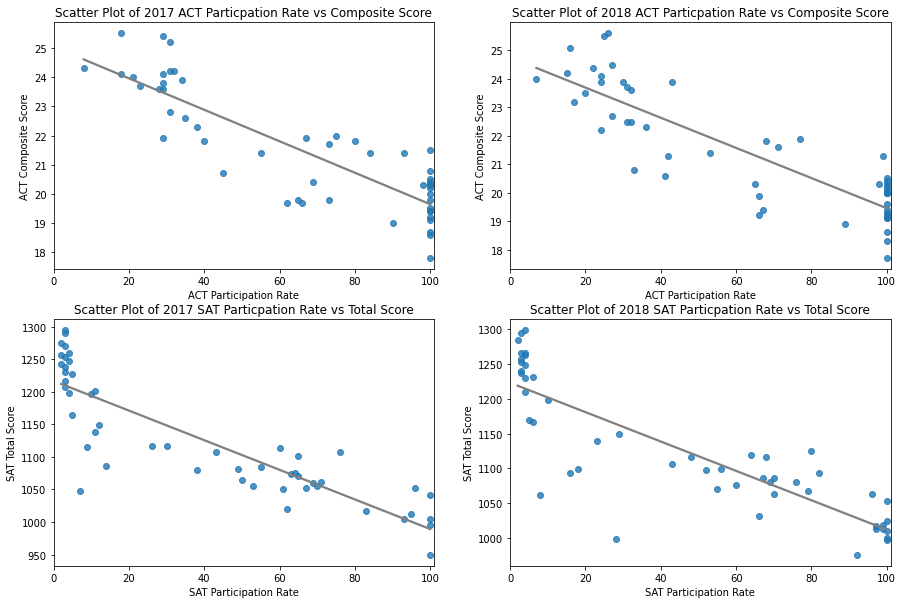

In [93]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
ax1=subplot_scatter(final, 'act_2017_participation_pct', 'act_2017_composite', 
                'Scatter Plot of 2017 ACT Particpation Rate vs Composite Score',
               'ACT Participation Rate', 'ACT Composite Score')
plt.gca().set_xlim(0,101)


plt.subplot(2,2,2)
ax2=subplot_scatter(final, 'act_2018_participation_pct', 'act_2018_composite', 
                'Scatter Plot of 2018 ACT Particpation Rate vs Composite Score',
               'ACT Participation Rate', 'ACT Composite Score')
plt.gca().set_xlim(0,101)


plt.subplot(2,2,3)
ax3=subplot_scatter(final, 'sat_2017_participation_pct', 'sat_2017_total', 
                'Scatter Plot of 2017 SAT Particpation Rate vs Total Score',
               'SAT Participation Rate', 'SAT Total Score' )
plt.gca().set_xlim(0,101)


plt.subplot(2,2,4)
ax4=subplot_scatter(final, 'sat_2018_participation_pct', 'sat_2018_total', 
                'Scatter Plot of 2018 SAT Particpation Rate vs Total Score',
               'SAT Participation Rate', 'SAT Total Score' )
plt.gca().set_xlim(0,101);



#### Observation
Negative correlation between participation rates and composite/total scores. Trend: The higher the participation rate for ACT/SAT, the lower the mean composite/total score

#### Bar graph comparing ACT and SAT participation by State in 2017 and 2018

In [94]:
# removing index number and replacing it with state name
final_stateindex = final.set_index("state",drop=True)
final_stateindex.head(2)

,act_2017_participation_pct,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation_pct,sat_2017_evidence_based_reading_and_writing,sat_2017_math,sat_2017_total,act_2018_participation_pct,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation_pct,sat_2018_evidence_based_reading_and_writing,sat_2018_math,sat_2018_total
state,,,,,,,,,,,,,,,,,,,,
Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165,100,18.9,18.3,19.6,19.0,19.1,6,595,571,1166
Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080,33,19.8,20.6,21.6,20.7,20.8,43,562,544,1106


<Figure size 1800x864 with 0 Axes>

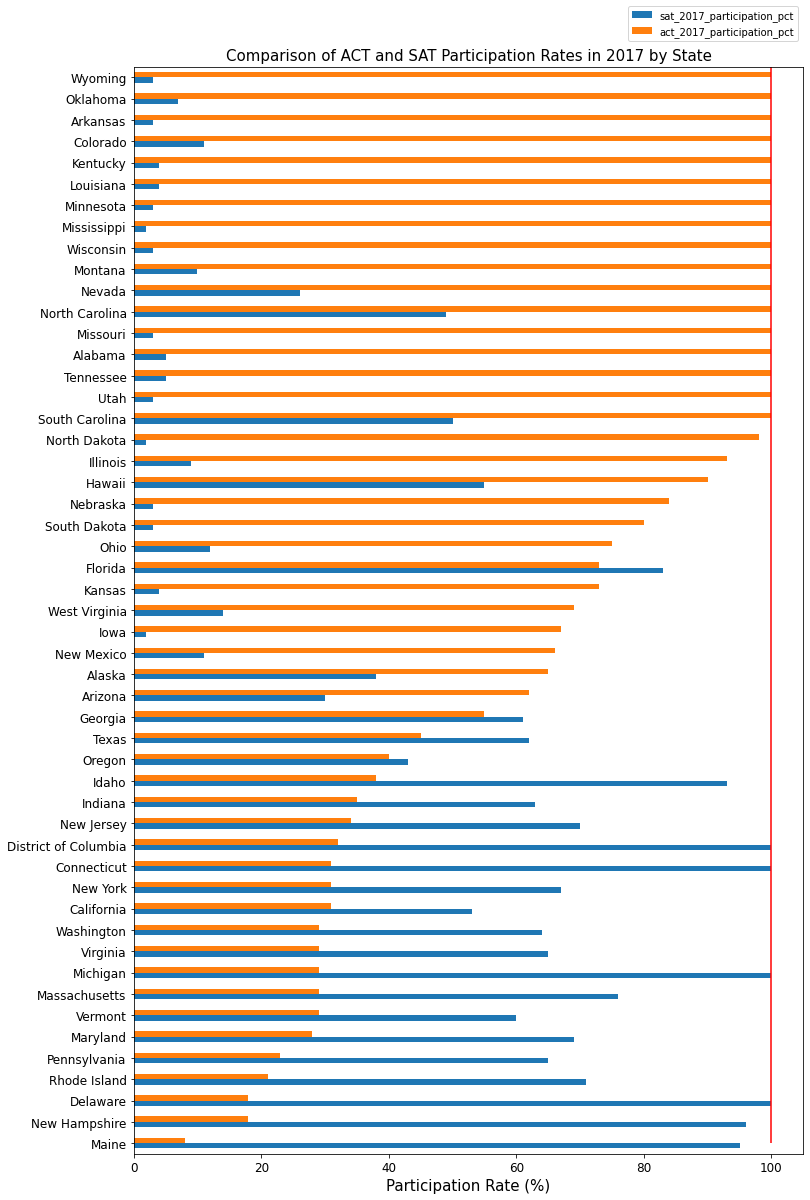

In [95]:
plt.figure(figsize=(25,12))

ax = final_stateindex[['sat_2017_participation_pct','act_2017_participation_pct']].sort_values('act_2017_participation_pct').plot(kind='barh', figsize=(12, 20), legend=True, fontsize=12)
ax.set_xlabel("Participation Rate (%)", fontsize=15)
ax.set_ylabel("")
ax.set_title("Comparison of ACT and SAT Participation Rates in 2017 by State", fontsize=15)
ax.vlines(x = 100, ymin=0, ymax=51, color='r')
ax.legend(bbox_to_anchor=(1, 1.06))


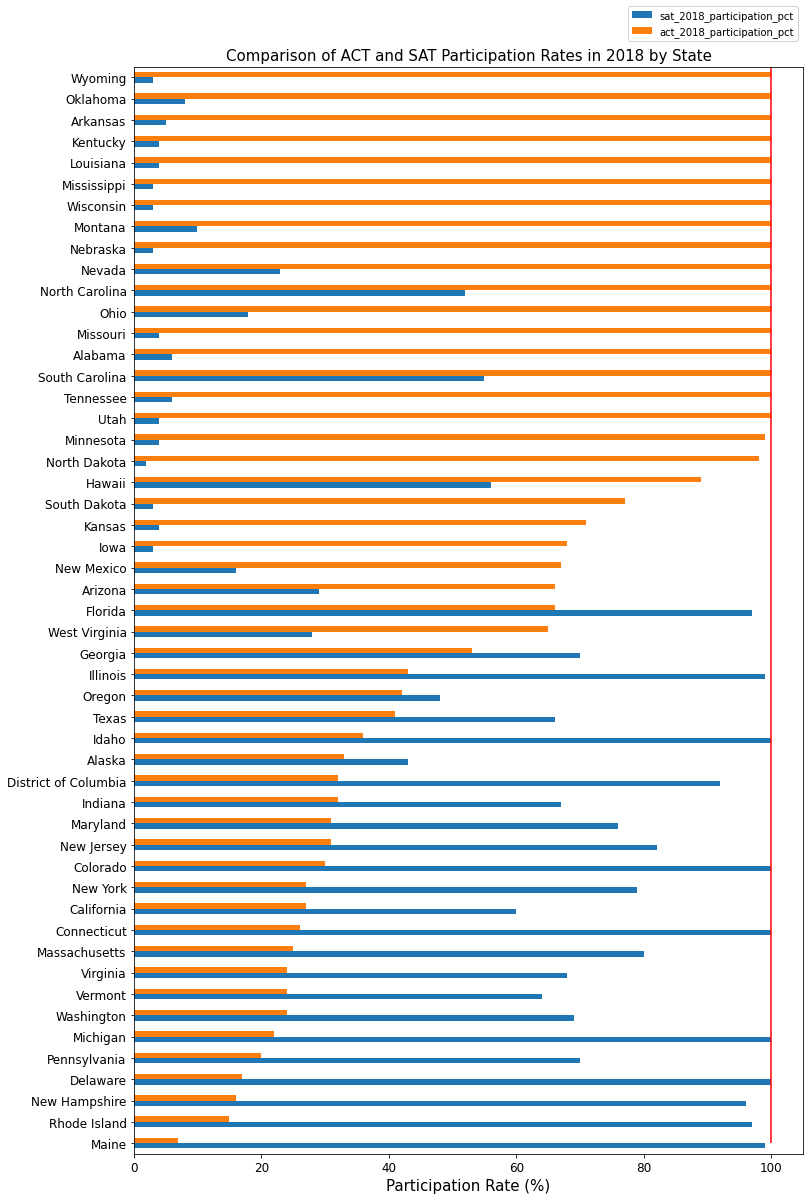

In [96]:
ax2 = final_stateindex[['sat_2018_participation_pct','act_2018_participation_pct']].sort_values('act_2018_participation_pct').plot(kind='barh', figsize=(12, 20), legend=True, fontsize=12)
ax2.set_xlabel("Participation Rate (%)", fontsize=15)
ax2.set_ylabel("")
ax2.set_title("Comparison of ACT and SAT Participation Rates in 2018 by State", fontsize=15)
ax2.vlines(x = 100, ymin=0, ymax=51, color='r')
ax2.legend(bbox_to_anchor=(1, 1.06))

#### Observation

The graphs show that high participation rate in ACT or SAT usually leads to lower participation in the other. This is particularly true for states with 100% in one test (denoted by red line), <b>i.e., mandatory testing for ACT usually means that participation in SAT is very low</b>.  

#### Scatter plot comparing ACT and SAT participation rates by year

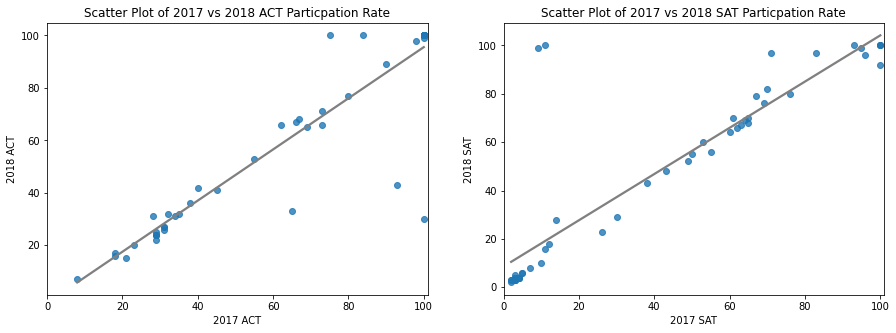

In [97]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,2)
subplot_scatter(final, 'sat_2017_participation_pct', 'sat_2018_participation_pct', 
                'Scatter Plot of 2017 vs 2018 SAT Particpation Rate',
               '2017 SAT', '2018 SAT' )
plt.gca().set_xlim(0,101)


plt.subplot(1,2,1)
subplot_scatter(final, 'act_2017_participation_pct', 'act_2018_participation_pct', 
                'Scatter Plot of 2017 vs 2018 ACT Particpation Rate',
               '2017 ACT', '2018 ACT' )
plt.gca().set_xlim(0,101);



#### Observation

3 states had high levels of ACT participation in 2017 (>60%) but fell to to 40% or less in 2018. Conversely, two states had less than 20% SAT participation in 2017 but close to or equal 100% participation in 2018

In [98]:
#Investigating the outlier states in ACT participation
act_outliers = final_stateindex['act_2018_participation_pct'] - final_stateindex['act_2017_participation_pct']
act_outliers.sort_values(ascending=True).head()

state
Colorado   -70
Illinois   -50
Alaska     -32
Florida     -7
Michigan    -7
dtype: int64

Colorado decreased ACT participation by 70% in 2018, Illinois decreased ACT participation by 50% in 2018, Alaska decreased ACT participation by 32% in 2018

In [99]:
#Investigating the outlier states in SAT participation
sat_outliers = final_stateindex['sat_2018_participation_pct'] - final_stateindex['sat_2017_participation_pct']
sat_outliers.sort_values(ascending=False).head()

state
Illinois         90
Colorado         89
Rhode Island     26
West Virginia    14
Florida          14
dtype: int64

Illinois increased SAT Participation by 90% in 2018, Colorado increased SAT participation by 89% in 2018

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

<img src="../images/2017_act_part.png" alt="2017 ACT Participation by US States"/>
<img src="../images/2018_act_part.png" alt="2018 ACT Participation by US States"/>
<img src="../images/2017_sat_part.png" alt="2017 SAT Participation by US States"/>
<img src="../images/2018_sat_part.png" alt="2018 SAT Participation by US States"/>
<img src="../images/2017_act_composite.png" alt="2017 ACT Composite Scores by US States"/>
<img src="../images/2018_act_composite.png" alt="2018 ACT Composite Scores by US States"/>
<img src="../images/2017_sat_total.png" alt="2017 SAT Total Scores by US States"/>
<img src="../images/2018_sat_total.png" alt="2018 SAT Total Scores by US States"/>

#### Observations

West and East coast states' participation in SAT is higher while Midwest states' participation in ACT is higher

States where ACT participation rates are high typically reflect lower SAT participation rates. States where SAT participation rates are high typically reflect lower ACT participation rates. This has been observed in earlier scatterplots

States where ACT composite scores are high typically have lower SAT total scores. States where SAT total scores are high typically have lower ACT composite scores. States would usually have high ACT scores due to low participation and low SAT scores due to high participation, and vice-versa

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [100]:
#check mean, min, max, 25th percentile, 75th percentile and standard deviration for variables
final.describe()

,act_2017_participation_pct,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation_pct,sat_2017_evidence_based_reading_and_writing,sat_2017_math,sat_2017_total,act_2018_participation_pct,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation_pct,sat_2018_evidence_based_reading_and_writing,sat_2018_math,sat_2018_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275,46.627451,567.294118,557.254902,1124.647059
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278,38.014187,45.317676,48.887562,93.843875
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000,2.000000,497.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000,4.500000,535.000000,521.500000,1062.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000,52.000000,552.000000,547.000000,1099.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000,79.500000,616.500000,600.500000,1220.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000,100.000000,643.000000,655.000000,1298.000000


In [101]:
def dist_plotter(sample):
    fig, ax = plt.subplots(figsize=(5,4))
    sns.distplot(sample, bins=50, kde=True)  #distplot gives histogram and curve 
    plt.show()
    
# Plot the columns to check if curve is normally distributed
# dist_plotter(final.column)

# Answers: 

2017 ACT Participation Rates and 2018 ACT Participation Rates are not normally distributed. The mean values, 65.25(2017) and 61.64(2018), are not depicted as the peak of the bell curve when plotted as a distribution curve. The peaks appear to be at the 25th percentile (31.00 for 2017 and 28.5 for 2018) the 75th percentile (100 for both). Both 2017 and 2018 also have a large spread as the standard deviations, 32.14(2017) and 34.08(2018), are high relative to their range which is 0 to 100. The curves also skew to the left as there is a tail extending left. 

2017 ACT English Score and 2018 ACT English Score are normally distributed. The mean values, 20.93(2017) and 20.98(2018), are depicted as the peak of the bell curve. However, there is a large spread as the standard deviations are 2.35(2017) and 2.44(2018), while the range of scores is 1 to 36. There is a right skew for both curves as the tail extends to the right.

2017 ACT Math Score and 2018 ACT Math Score are normally distributed. The mean values, 21.18(2017) and 21.12(2018), are depicted as the peak of the bell curve. However, there is a large spread as the standard deviations are 1.98(2017) and 2.03(2018), while the range of scores is 1 to 36. There is a right skew for both curves as the tail extends to the right.

2017 ACT Reading Score and 2018 ACT Reading Score are normally distributed. The mean values, 22.01(2017) and 22.01(2018), are depicted as the peak of the bell curve. However, there is a large spread as the standard deviations are 2.06(2017) and 2.16(2018), while the range of scores is 1 to 36. There is a right skew for both curves as the tail extends to the right.

2017 ACT Science Score and 2018 ACT Science Score are normally distributed. The mean values, 21.45(2017) and 21.34(2018), are depicted as the peak of the bell curve. However, there is a large spread as the standard deviations are 1.73(2017) and 1.87(2018), while the range of scores is 1 to 36. There is a right skew for both curves as the tail extends to the right.

2017 ACT Composite Score and 2018 ACT Composite Score are normally distributed. The mean values, 21.51(2017) and 21.48(2018), are depicted as the peak of the bell curve. However, there is a large spread as the standard deviations are 2.02(2017) and 2.10(2018), while the range of scores is 1 to 36. There is a right skew for both curves as the tail extends to the right.

2017 SAT Participation Rates and 2018 SAT Participation Rates are not normally distributed. The mean values, 39.80(2017) and 46.62(2018), are not depicted as the peak of the bell curve when plotted as a distribution curve. The peaks appear to be at the 25th percentile (4 for 2017 and 4.5 for 2018) the 75th percentile (66 for 2017 and 79.5 for 2018). Both 2017 and 2018 have a large spread as the standard deviations, 35.27(2017) and 38.01(2018), are high relative to their range, which is 0 to 100. The curves also skew to the right as there is a tail extending right. 

2017 SAT Evidence-Based Reading and Writing Score and 2018 SAT Evidence-Based Reading and Writing Score are normally distributed. The mean values, 569.11(2017) and 567.29(2018), are depicted near the peak of the bell curve. However, there is a large spread as the standard deviations are 45.66(2017) and 45.31(2018), while the range of scores is 0 to 800. There is a right skew for both curves as the tail extends to the right.

2017 SAT Math Score and 2018 SAT Math Score are normally distributed. The mean values, 556.8(2017) and 557.25(2018), are depicted near the peak of the bell curve. However, there is a large spread as the standard deviations are 47.12(2017) and 49.88(2018), while the range of scores is 0 to 800. There is a right skew for both curves as the tail extends to the right.

2017 SAT Total Score and 2018 SAT Total Score are normally distributed. The mean values, 1126.09(2017) and 1124.64(2018), are depicted near the peak of the bell curve. However, there is a large spread as the standard deviations are 92.49(2017) and 93.84(2018), while the range of scores is 0 to 1600. There is a right skew for both curves as the tail extends to the right.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No. The participation rates (ACT and SAT) are not normally distributed as the sample size is too small, and the standard deviation (spread) is too high 

However, this trend is somewhat observed for test scores (both ACT and SAT). This is because they are made up of sample mean scores from the population of students who participated in the test in each state. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: 

The assumption holds for math and reading scores as distributions is close to normal. Therefore, applying central limit theorem, the more sample means derived from math/reading scores, the closer the sample mean will be to the real math/reading score mean, i.e., estimates more precise as sample means increase. 

On the other hand, the assumption does not hold for participation rates which are not close to normal. However, using central limit theorem, our sample size of 51 would result in participation rates becoming more asymtotically distributed as the number of sample means increases. This would allow the sample mean of participation rates to be closer to the real participation rate mean as the number of sample mean increases. I.e., estimates more precise as sample means increase. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: No, the participation rates are not independent of each other. Some students take both ACT and SAT, and would be counted in both particpation rates.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No, the samples drawn would not be of the same size as the people taking the math ACT and SAT tests differ by state. The ACT and SAT also have different scoring systems and must be normalised before making comparisons 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [102]:
# Code: NA


I did not conduct hypothesis tests as it is not appropriate to compare participation rates or test scores due to the reasons mentioned above. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

There were 3 states whose participation in ACT fell drastically from 2017 to 2018, namely, <b>Alaska</b> (65% to 33%), <b>Colorado</b> (100% to 30%) and <b>Illinois</b> (93% to 43%). 

Incidentally, Colorado and Illinois saw a drastic increase in SAT participation from 2017 to 2018. Colorado's SAT participation grew from 11% to 100% while Illinois' participation grew from 9 to 99%. However, the SAT participation rate for Alaska only saw a marginal increase (38% in 2017 and 43% in 2018). 

The blue dots in the scatterplots below highlight the participation rates for Alaska, Colorado and Illinois for each of the tests in 2017 and 2018

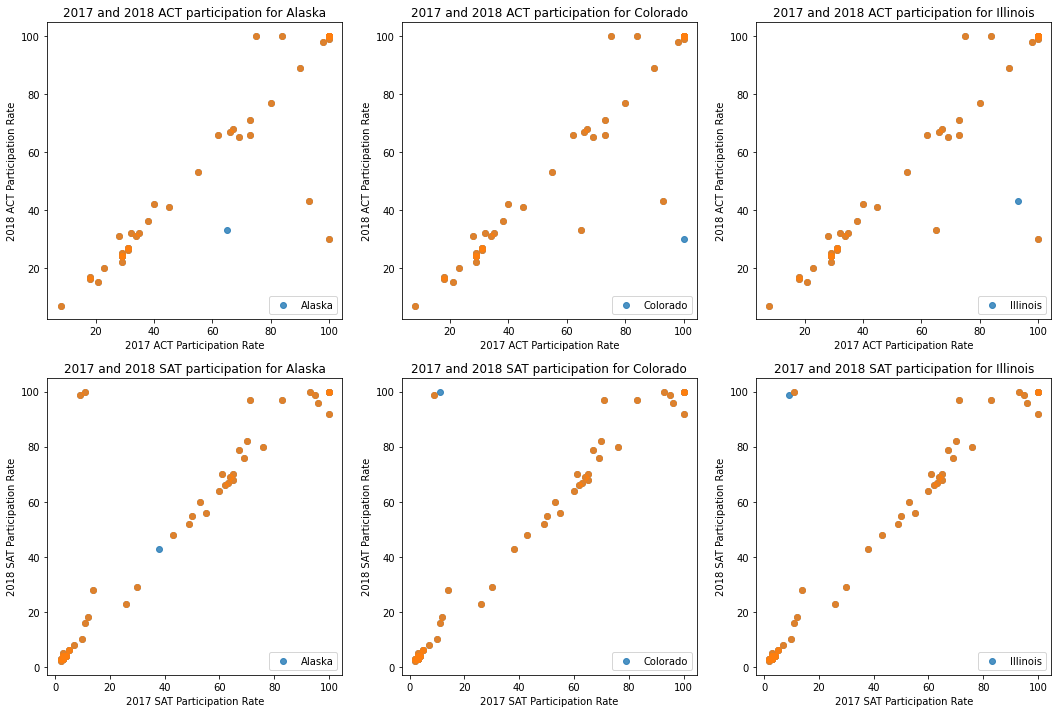

In [103]:
# Plotting scatter plot to depict how participation rate for in ACT and SAT changed for 
# Alaska, Colorado and Illinois in 2017 and 2018

#Creating dataframes without Alaska, Colorado and Illinois
final_noalaska = final[final['state']!='Alaska']
final_nocolorado = final[final['state']!='Colorado']
final_noillinois = final[final['state']!='Illinois']

plt.figure(figsize=(18, 12))

#Showing participation rates in ACT for Alaska, Colorado and Illinois

#Show Alaska's participation in 2017 and 2018 ACT
plt.subplot(2,3,1)
sns.regplot(x='act_2017_participation_pct', y='act_2018_participation_pct', data=final, fit_reg=False)
sns.regplot(x='act_2017_participation_pct', y='act_2018_participation_pct', data=final_noalaska, fit_reg=False)
plt.title("2017 and 2018 ACT participation for Alaska")
plt.legend(['Alaska'], loc=4)
plt.xlabel('2017 ACT Participation Rate')
plt.ylabel('2018 ACT Participation Rate')

#Show Colorado's participation in 2017 and 2018 ACT
plt.subplot(2,3,2)
sns.regplot(x='act_2017_participation_pct', y='act_2018_participation_pct', data=final, fit_reg=False)
sns.regplot(x='act_2017_participation_pct', y='act_2018_participation_pct', data=final_nocolorado, fit_reg=False)
plt.title("2017 and 2018 ACT participation for Colorado")
plt.legend(['Colorado'], loc=4)
plt.xlabel('2017 ACT Participation Rate')
plt.ylabel('2018 ACT Participation Rate')

#Show Illinois' participation in 2017 and 2018 ACT
plt.subplot(2,3,3)
sns.regplot(x='act_2017_participation_pct', y='act_2018_participation_pct', data=final, fit_reg=False)
sns.regplot(x='act_2017_participation_pct', y='act_2018_participation_pct', data=final_noillinois, fit_reg=False)
plt.title("2017 and 2018 ACT participation for Illinois")
plt.legend(['Illinois'], loc=4)
plt.xlabel('2017 ACT Participation Rate')
plt.ylabel('2018 ACT Participation Rate')

#Showing participation rates in SAT for Alaska, Colorado and Illinois

#Show Alaska's participation in 2017 and 2018 SAT
plt.subplot(2,3,4)
sns.regplot(x='sat_2017_participation_pct', y='sat_2018_participation_pct', data=final, fit_reg=False)
sns.regplot(x='sat_2017_participation_pct', y='sat_2018_participation_pct', data=final_noalaska, fit_reg=False)
plt.title("2017 and 2018 SAT participation for Alaska")
plt.legend(['Alaska'])
plt.xlabel('2017 SAT Participation Rate')
plt.ylabel('2018 SAT Participation Rate')

#Show Colorado's participation in 2017 and 2018 SAT
plt.subplot(2,3,5)
sns.regplot(x='sat_2017_participation_pct', y='sat_2018_participation_pct', data=final, fit_reg=False)
sns.regplot(x='sat_2017_participation_pct', y='sat_2018_participation_pct', data=final_nocolorado, fit_reg=False)
plt.title("2017 and 2018 SAT participation for Colorado")
plt.legend(['Colorado'])
plt.xlabel('2017 SAT Participation Rate')
plt.ylabel('2018 SAT Participation Rate')

#Show Illinois' participation in 2017 and 2018 SAT
plt.subplot(2,3,6)
sns.regplot(x='sat_2017_participation_pct', y='sat_2018_participation_pct', data=final, fit_reg=False)
sns.regplot(x='sat_2017_participation_pct', y='sat_2018_participation_pct', data=final_noillinois, fit_reg=False)
plt.title("2017 and 2018 SAT participation for Illinois")
plt.legend(['Illinois'])
plt.xlabel('2017 SAT Participation Rate')
plt.ylabel('2018 SAT Participation Rate');


### Research to explain the changes in participation rates for Colorado, Illinois and Alaska

There had been an overall spike in SAT participation rates in 2018, which saw it overtaking the ACT in terms of the US' most widely used college admission test for the first time since 2012<sup>[[1]](https://www.politico.com/newsletters/morning-education/2018/10/25/sat-scores-rise-as-do-the-numbers-of-test-takers-388387)</sup>. 2 million US students sat for the SAT, compared to 1.91 million who took the ACT. The increase in SAT participation was attributed to an increase in the delivery of the SAT on school days as well as a revamped version of the SAT which was introduced in 2016 along with more readily available practice, fee waivers and scholarship opportunities. <sup>[[2]](https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/)</sup>

Colorado, Illinois and Alaska follow this trend. 

#### Colorado
    
In 2017, Colorado shifted its mandatory state-administered test from ACT to SAT, which was fully implemented in 2018. <sup>[[3]](https://www.testive.com/colorado-sat-change-2017/)</sup>. The test was also administered free of charge for public school students in Colorado<sup>[[4]](https://www.collegeboard.org/releases/2018/more-than-2-million-students-in-class-of-2018-took-sat-highest-ever)</sup>. As a result, participation in SAT increased while participation in ACT fell. 

#### Illinois

Like Colorado, Illinois shifted its mandatory state-administered testing from ACT to SAT, which was fully implemented in 2018. <sup> [[5]](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html)</sup>. The SAT was also administered for free for public school students<sup>[[6]](https://www.collegeboard.org/releases/2018/more-than-2-million-students-in-class-of-2018-took-sat-highest-ever)</sup>. Accordingly, SAT participation rates spiked while ACT participation rates plunged. 

#### Alaska 

Alaska, unlike Colorado and Illinois, saw its requirement for graduating students to sit for college readiness tests expire in June 2016. This meant that from 2017, students no longer need to take the SAT, ACT or WorkKeys tests to graduate <sup> [[7]](https://www.adn.com/alaska-news/education/2016/06/30/students-no-longer-need-national-tests-to-graduate/)</sup>. Its effect was fully felt in 2018 when participation rates fell drastically for ACT. Notwithstading, participation rates rose marginally for SAT in 2018. It is unclear why ACT participation rates decreased more than SAT rates increased but it could be due how well the students perceived the test suited their academic abilities and/or fulfilled entry requirements of the university they wanted to attend. 

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### Key takeaways
- High participation rates in one test usually result in low participation rates for the other. This is because students typically take only one test which is adequate to fulfill university entry requirements 
- Participation rates are negatively correlated with test scores, i.e., states with high participation in a test would usually have a low mean score, and vice-versa. 
    - Tests with low participation rates have high mean total/composite scores. Students taking the non-compulsory/"less popular" test would likely be a minority group of academically-inclined students seeking to increase their chances of getting into a good university by taking both ACT and SAT. <sup>[[8]](https://www.nytimes.com/2013/08/04/education/edlife/more-students-are-taking-both-the-act-and-sat.html)</sup>
- SAT is more popular with West and East coast states, while Midwest states have a preference for ACT. 

### Efforts to increase SAT participation should be focused on Oregon
- Oregon does not have mandatory testing for ACT. 
    - Efforts should be focused on states without compulsory ACT testing, since it is less likely that students would take both ACT and SAT since one test is enough for university admission. As such, participation rates in SAT would be difficult to raise for these states
- It currently has low participation rates for both ACT (40% in 2017 and 42% in 2018) and SAT (43% in 2017 and 48% in 2018). 
    - The split between students taking the ACT or SAT has been very even between 2017 and 2018, which means that SAT is consistently perceived by half of Oregon's test-taking population as the better option. The College Board could focus its efforts on persuading the other half to choose SAT instead of ACT. 

### Recommendations
- Reduce cost of SAT to make it more competitive as SAT and ACT are currently similarly priced <sup>[[9]](https://blog.prepscholar.com/sat-cost-act-cost-and-how-to-save-money)</sup>. The College Board could also make the condition for fee waivers more lenient to allow to more underprivileged students to take the SAT. 
- Increase marketing on benefits of SAT compared to ACT to convince states/schools to conduct more SAT tests. One such benefit could be the introduction of an "Adversity Index", designed to place students' SAT scores in the context of their socioeconomic advantages/disadvantages <sup> [[10]](https://www.insidehighered.com/admissions/article/2019/05/20/college-board-will-add-adversity-score-everyone-taking-sat)</sup>
- Make practice material more readily available by working with schools to provide comprehensive prep material at a reduced cost 

If successful, these recommendations could be applied to other states with similar participation rates with Oregon and has no mandatory testing for ACT. Based on the 2017/2018 data, these states are Alaska, California, Iowa, Kansas and West Virginia. 

### Helpful additional data:
- Statistics on states that could have affected participation rates such as income, race, etc. (Mostly socio-economic indicators would be useful.)

